### Part 2: Customer Profiling and Visualisation.

#### 1. Import Libraries and Dataset

In [1]:
#import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create a path
path = r'C:\Users\Lumex\Documents\Achievement_4_Project\InstaCart Basket Analysis'

In [3]:
#import customer_exclusion Dataset
df_exclusion = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_customer_exclusion.pkl'))

#### 2. Create Customer Profile

Demographic;
Dependents: Has dependents, No dependents
Income flag : high, middle, low 
Age flag: young_adult, adult, older_adult, senior 
Family Status: single, married, divorced/widowed, living with parents and siblings

Customer Profiles:
Single with No Dependents
Single with Dependents
Married  with No Dependents
Married with Dependents
Divorced/widowed with No Dependents
Divorced/Widowed with Dependents
Living with parents/siblings with No Dependents
Living with parents/siblings with Dependents

#### 2.1 create dependents groups.

In [4]:
# Define get_dependents
def get_dependents(number_of_dependents):
    if number_of_dependents > 0:
        return 'Has dependents'
    else:
        return 'No dependents'

# Apply the dependents_flag function
df_exclusion['dependents_flag'] = df_exclusion['number_of_dependents'].apply(get_dependents)

In [5]:
df_exclusion['dependents_flag'].value_counts()

dependents_flag
Has dependents    23224883
No dependents      7739681
Name: count, dtype: int64

#### 2.2 Customer Profiling

In [6]:
# Define the function to create profiles

def create_profile(row):
    return f"{row['marital_status']}, {row['dependents_flag']}"

# Apply the function to create a new column 'customer_profile'
df_exclusion['customer_profile'] = df_exclusion.apply(create_profile, axis = 1)

In [7]:
df_exclusion.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,state,date_joined,number_of_dependents,marital_status,income_flag,age_flag,region,activity_level,dependents_flag,customer_profile
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Alabama,2/17/2019,3,married,Low income,Adult,South,High-activity customer,Has dependents,"married, Has dependents"
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,Alabama,2/17/2019,3,married,Low income,Adult,South,High-activity customer,Has dependents,"married, Has dependents"
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,Alabama,2/17/2019,3,married,Low income,Adult,South,High-activity customer,Has dependents,"married, Has dependents"
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,Alabama,2/17/2019,3,married,Low income,Adult,South,High-activity customer,Has dependents,"married, Has dependents"
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,Alabama,2/17/2019,3,married,Low income,Adult,South,High-activity customer,Has dependents,"married, Has dependents"


#### 3. Visualization of customer profiling

Text(0, 0.5, 'Number of Products Purchased')

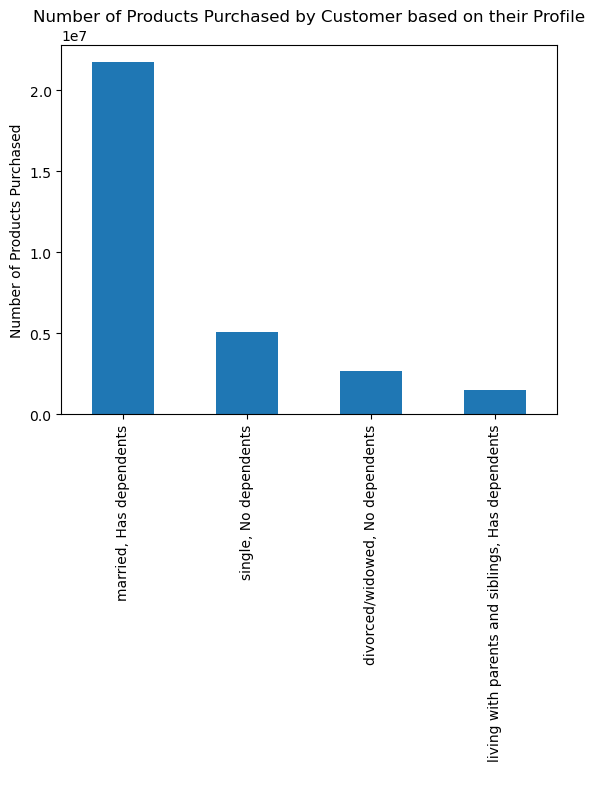

In [8]:
# Create chart showing distribution of customers by 'customer_profile'
customer_exclusion = df_exclusion['customer_profile'].value_counts()
exclusion_bar = customer_exclusion.plot.bar()

plt.title('Number of Products Purchased by Customer based on their Profile')
plt.xlabel(' ')
plt.ylabel('Number of Products Purchased')


In [9]:
#export chart
exclusion_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customerprofile_barchart.png'))

In [10]:
df_exclusion.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'match', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_regularity',
       'frequency_flag', 'Gender', 'state', 'date_joined',
       'number_of_dependents', 'marital_status', 'income_flag', 'age_flag',
       'region', 'activity_level', 'dependents_flag', 'customer_profile'],
      dtype='object')

#### Basic statistics on customer profile on expenditure and frequency usage

In [11]:
#create total_expenditure
df_exclusion['total_expenditure'] = df_exclusion.groupby('user_id')['prices'].transform('sum')

In [12]:
df_exclusion.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'match', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_regularity',
       'frequency_flag', 'Gender', 'state', 'date_joined',
       'number_of_dependents', 'marital_status', 'income_flag', 'age_flag',
       'region', 'activity_level', 'dependents_flag', 'customer_profile',
       'total_expenditure'],
      dtype='object')

#### Create a profiling variable based on age, income, certain goods in the department_id and number of dependents

##### Department and certain goods analysis

In [13]:
#count the number of products sold for each department
dept_sale = df_exclusion.groupby('department_id')['product_id'].count()

#sort the
dept_sale_sorted = dept_sale.sort_values(ascending = False)

#select vthe top 10 department
top_10_dept = dept_sale_sorted.head(10)

In [14]:
top_10_dept

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
Name: product_id, dtype: int64

In [15]:
#convert series to a dataframe
top_10_dept = top_10_dept.to_frame().reset_index()

In [16]:
top_10_dept

,department_id,product_id
0,4,9079273
1,16,5177182
2,19,2766406
3,7,2571901
4,1,2121731
5,13,1782705
6,3,1120828
7,15,1012074
8,20,1003834
9,9,822136


In [17]:
#rename the product_id as number of products sold
top_10_dept.rename(columns = {'product_id' : 'no_of_products_sold'}, inplace = True)
top_10_dept

,department_id,no_of_products_sold
0,4,9079273
1,16,5177182
2,19,2766406
3,7,2571901
4,1,2121731
5,13,1782705
6,3,1120828
7,15,1012074
8,20,1003834
9,9,822136


In [18]:
#import department dataset
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [19]:
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [20]:
top_10_dept_merged = top_10_dept.merge(departments, on = 'department_id', how = 'left')
top_10_dept_merged

,department_id,no_of_products_sold,department
0,4,9079273,produce
1,16,5177182,dairy eggs
2,19,2766406,snacks
3,7,2571901,beverages
4,1,2121731,frozen
5,13,1782705,pantry
6,3,1120828,bakery
7,15,1012074,canned goods
8,20,1003834,deli
9,9,822136,dry goods pasta


Text(0.5, 1.0, 'Top Department by product sold')

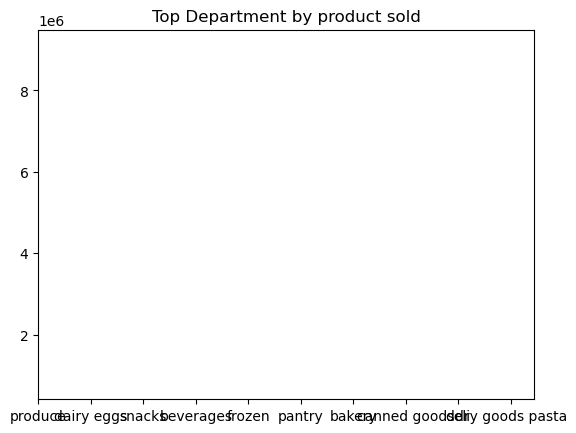

In [25]:
#create horizontal bar chart showing the top ten department
plt.figure(figsize=(10,6))
plt.title('Top 10 Departments by Number of Products Sold')
#set ticks and add gridlines
x_ticks = np.arange(0, 10000000, 2000000)
plt.xticks(x_ticks)
plt.grid(axis='x', linestyle ='--', linewidth=0.5, color='grey', zorder=0)
#Define a function to format x-axis
def value_formatter(x,pos):
    return f'